<a href="https://colab.research.google.com/github/ImKshitij09/AIProject/blob/main/Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
#import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib


Importing All the libraries necesaary for running the program

In [66]:
#Upload and read the dataset
forecastor = pd.read_csv('energy_dataset.csv')

Loading and reading the dataset

In [67]:
forecastor.head()  # Display the first few rows

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.0                       0.0                   6378.0   
1  ...             195.0                       0.0                   5890.0   
2  ...             196.0                       0.0                   5461.0   
3  ...             191.0                       0.0                   5238.0   
4  ...             189.0                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                        17                                NaN   
1                        16                                NaN   
2                         8                                NaN   
3                         2                                NaN   
4                         9                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                             6436                26118            25385.0   
1                             5856                24934            24382.0   
2                             5454                23515            22734.0   
3                             5151                22642            21286.0   
4                             4861                21785            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 29 columns]

The dataset contains information about different renewable and fossilenergy generation sources from 2015 to 2019 for each month and each hour of the day. This suggests that the dataset focuses on energy production and consumption.
The columns 'total load actual' and 'total load forecast' likely represent the actual and forecasted electricity demand.
price actual' and 'price day ahead' suggest that the dataset includes information about energy prices.

In [68]:
forecastor.info() # Get information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

The forecastor dataset is a time series focused on energy generation, consumption, and prices
There are 29 columns and 35064 entries.
 It has columns withh missing values that need to be addresse such as  generation hydro pumped storage aggregated and forecast wind offshore eday ahead.

In [69]:
forecastor.describe() # Get descriptive statistics

generation biomass  generation fossil brown coal/lignite  \
count        35045.000000                          35046.000000   
mean           383.513540                            448.059208   
std             85.353943                            354.568590   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil coal-derived gas  generation fossil gas  \
count                             35046.0           35046.000000   
mean                                  0.0            5622.737488   
std                                   0.0            2201.830478   
min                                   0.0               0.000000   
25%                                   0.0            4126.000000   
50%                                   0.0            4969.000000   
75%                                   0.0            6429.000000   
max                                   0.0           20034.000000   

       generation fossil hard coal  generation fossil oil  \
count                 35046.000000           35045.000000   
mean                   4256.065742             298.319789   
std                    1961.601013              52.520673   
min                       0.000000               0.000000   
25%                    2527.000000             263.000000   
50%                    4474.000000             300.000000   
75%                    5838.750000             330.000000   
max                    8359.000000             449.000000   

       generation fossil oil shale  generation fossil peat  \
count                      35046.0                 35046.0   
mean                           0.0                     0.0   
std                            0.0                     0.0   
min                            0.0                     0.0   
25%                            0.0                     0.0   
50%                            0.0                     0.0   
75%                            0.0                     0.0   
max                            0.0                     0.0   

       generation geothermal  generation hydro pumped storage aggregated  ...  \
count                35046.0                                         0.0  ...   
mean                     0.0                                         NaN  ...   
std                      0.0                                         NaN  ...   
min                      0.0                                         NaN  ...   
25%                      0.0                                         NaN  ...   
50%                      0.0                                         NaN  ...   
75%                      0.0                                         NaN  ...   
max                      0.0                                         NaN  ...   

       generation waste  generation wind offshore  generation wind onshore  \
count      35045.000000                   35046.0             35046.000000   
mean         269.452133                       0.0              5464.479769   
std           50.195536                       0.0              3213.691587   
min            0.000000                       0.0                 0.000000   
25%          240.000000                       0.0              2933.000000   
50%          279.000000                       0.0              4849.000000   
75%          310.000000                       0.0              7398.000000   
max          357.000000                       0.0             17436.000000   

       forecast solar day ahead  forecast wind offshore eday ahead  \
count              35064.000000                                0.0   
mean                1439.066735                                NaN   
std                 1677.703355       

Descriptive statistics show that the total actual load has an average of [mean value] MW, ranging from [min value] MW to [max value] MW. The price actual has a mean of [mean value] €/MWh and ranges from [min value] €/MWh to [max value] €/MWh.

In [70]:
forecastor.replace(0.0, np.nan, inplace=True)  # Replace zeros with NaN
missing_values = forecastor.isnull().sum() #check for missingg values
missing_percentage = (forecastor.isnull().sum() / len(forecastor)) * 100 #percentage of missinf vaalues

# Combine both into a summary table and display in ascending order
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

print(missing_summary)

                                             Missing Values  Percentage
generation marine                                     35064  100.000000
generation fossil coal-derived gas                    35064  100.000000
forecast wind offshore eday ahead                     35064  100.000000
generation wind offshore                              35064  100.000000
generation fossil oil shale                           35064  100.000000
generation fossil peat                                35064  100.000000
generation geothermal                                 35064  100.000000
generation hydro pumped storage aggregated            35064  100.000000
generation hydro pumped storage consumption           12626   36.008442
generation fossil brown coal/lignite                  10535   30.045060
forecast solar day ahead                                539    1.537189
total load actual                                        36    0.102669
generation biomass                                       23    0

In [71]:
#dropping columns that have more than 25% missing values
columns_to_drop = ['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead','generation marine','generation fossil coal-derived gas','generation wind offshore','generation fossil oil shale','generation fossil peat','generation geothermal']
forecastor = forecastor.drop(columns=columns_to_drop)

In [72]:
# Replace missing values with the mean of each *numeric* column
for column in forecastor.select_dtypes(include=np.number).columns:
    forecastor[column] = forecastor[column].fillna(forecastor[column].mean())

# Verify that missing values in numeric columns have been filled
print(forecastor.select_dtypes(include=np.number).isnull().sum())

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64


Here we notice in the dataset there are NaN and 0.0 as missing values. We convert all 0.0 to NaN values and eliminate those columns and fill in columns with missing values using mean. We drop columns that have null value more than 25% and use mean to fill in columns with missing values.



In [73]:
# Convert 'time' column to datetime and remove timezone information
forecastor['time'] = pd.to_datetime(forecastor['time'], utc=True).dt.tz_localize(None)
print(forecastor['time'].head())


0   2014-12-31 23:00:00
1   2015-01-01 00:00:00
2   2015-01-01 01:00:00
3   2015-01-01 02:00:00
4   2015-01-01 03:00:00
Name: time, dtype: datetime64[ns]


We notice in our dataset Time is an object datatyp with  timezone, this creates irregularities. So we convert that into and time and eliminate timezone information for better data handling

**Feature Engineering**
We can use feature engineering to group various features into one for better data processing and handling.
We group all fossil sources into one data set and the same for all renewable sources.
These aggregated columns allow the model to focus on the total contribution of renewable and fossil energy rather than individual sources, reducing feature complexity and improving interpretability
Adding time features helps the model understand the influence of time on energy demand, improving its ability to capture periodic variations.
renewable_fossil_ratio: This ratio compares the contribution of renewable and fossil sources for energy generation.
load_difference: Measures the discrepancy between the actual energy demand and the grid operator's forecast.





In [74]:
# Grouping renewable and fossil columns into new features
renewable_sources = [
    'generation biomass', 'generation hydro run-of-river and poundage',
    'generation hydro water reservoir','generation solar',
    'generation wind onshore', 'generation other renewable','generation nuclear'
]

fossil_sources = [
    'generation fossil brown coal/lignite','generation fossil gas', 'generation fossil hard coal', 'generation fossil oil']

forecastor['renewable_generation'] = forecastor[renewable_sources].sum(axis=1)
forecastor['fossil_generation'] = forecastor[fossil_sources].sum(axis=1)

#Adding temporal and derived features
forecastor['time'] = pd.to_datetime(forecastor['time'], utc=True).dt.tz_localize(None)
forecastor['hour'] = forecastor['time'].dt.hour
forecastor['day_of_week'] = forecastor['time'].dt.dayofweek
forecastor['month'] = forecastor['time'].dt.month
forecastor['year'] = forecastor['time'].dt.year

forecastor['renewable_fossil_ratio'] = forecastor['renewable_generation'] / (
    forecastor['fossil_generation'] + 1e-6  # Avoid division by zero
)

forecastor['load_difference'] = forecastor['total load actual'] - forecastor['total load forecast']

# Display the updated dataframe with new features
forecastor.head()


time  generation biomass  \
0 2014-12-31 23:00:00               447.0   
1 2015-01-01 00:00:00               449.0   
2 2015-01-01 01:00:00               448.0   
3 2015-01-01 02:00:00               438.0   
4 2015-01-01 03:00:00               428.0   

   generation fossil brown coal/lignite  generation fossil gas  \
0                                 329.0                 4844.0   
1                                 328.0                 5196.0   
2                                 323.0                 4857.0   
3                                 254.0                 4314.0   
4                                 187.0                 4130.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4755.0                  158.0   
2                       4581.0                  157.0   
3                       4131.0                  160.0   
4                       3840.0                  156.0   

   generation hydro pumped storage consumption  \
0                                        863.0   
1                                        920.0   
2                                       1164.0   
3                                       1503.0   
4                                       1826.0   

   generation hydro run-of-river and poundage  \
0                                      1051.0   
1                                      1009.0   
2                                       973.0   
3                                       949.0   
4                                       953.0   

   generation hydro water reservoir  generation nuclear  ...  price day ahead  \
0                            1899.0              7096.0  ...            50.10   
1                            1658.0              7096.0  ...            48.10   
2                            1371.0              7099.0  ...            47.33   
3                             779.0              7098.0  ...            42.27   
4                             720.0              7097.0  ...            38.41   

   price actual  renewable_generation  fossil_generation  hour  day_of_week  \
0         65.41               16993.0            10156.0    23            2   
1         64.92               16223.0            10437.0     0            3   
2         64.48               15475.0             9918.0     1            3   
3         59.32               14627.0             8859.0     2            3   
4         56.04               14249.0             8313.0     3            3   

   month  year  renewable_fossil_ratio  load_difference  
0     12  2014                1.673198           -733.0  
1      1  2015                1.554374           -552.0  
2      1  2015                1.560294           -781.0  
3      1  2015                1.651089          -1356.0  
4      1  2015                1.714062          -1521.0  

[5 rows x 29 columns]

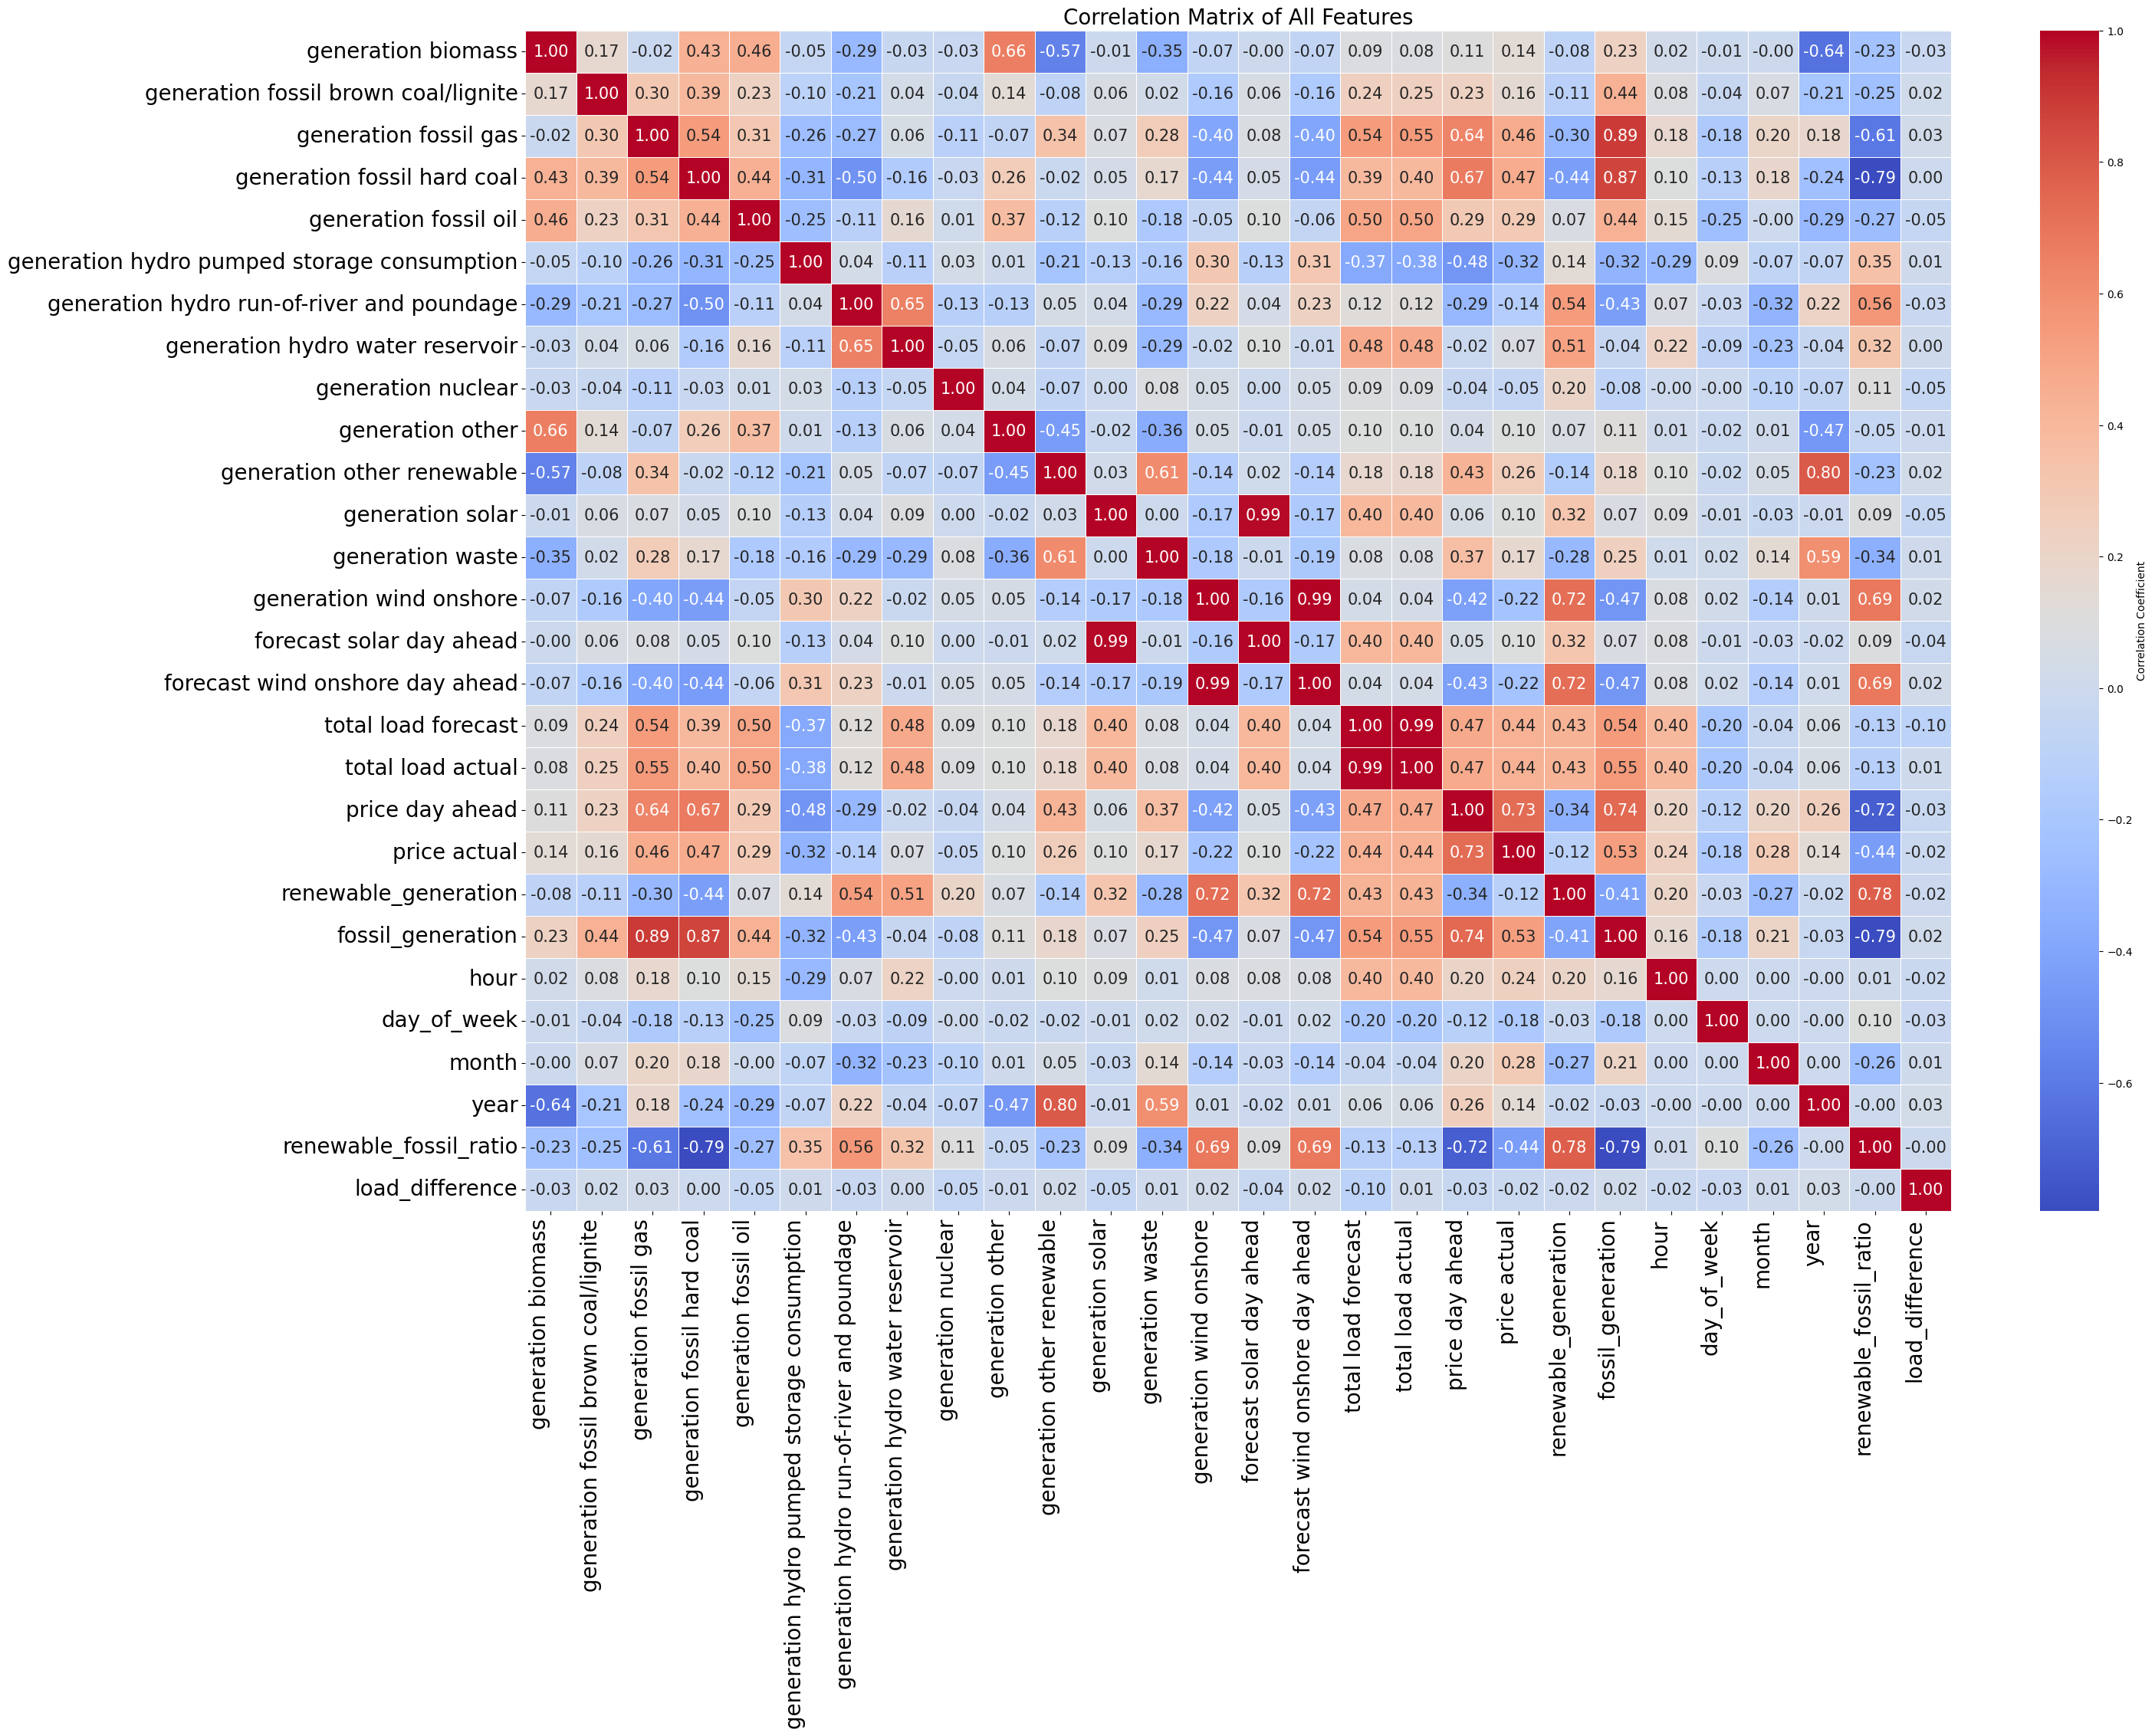

In [75]:

# Compute the correlation matrix for all features
correlation_matrix = forecastor.drop(columns=['time']).corr()

# Plot the heatmap
plt.figure(figsize=(30, 20))  # Set the figure size
sns.heatmap(
    correlation_matrix,
    annot=True,           # Show correlation coefficients
    fmt=".2f",            # Format coefficients to 2 decimal places
    cmap='coolwarm',      # Use the 'coolwarm' color scheme
    linewidths=0.5,       # Add cell dividers
    cbar_kws={'label': 'Correlation Coefficient'},  # Label for the color bar
    annot_kws={"size": 15}  # Reduce annotation text size
)

# Add a title and adjust label orientation
plt.title('Correlation Matrix of All Features', fontsize=20)
plt.xticks(rotation=90, ha='right', fontsize=20)  # Rotate x-axis labels
plt.yticks(fontsize=20)                           # Keep y-axis labels horizontal
plt.show()


The correlation matrix quantifies the statistical relationships between numerical features in the dataset.

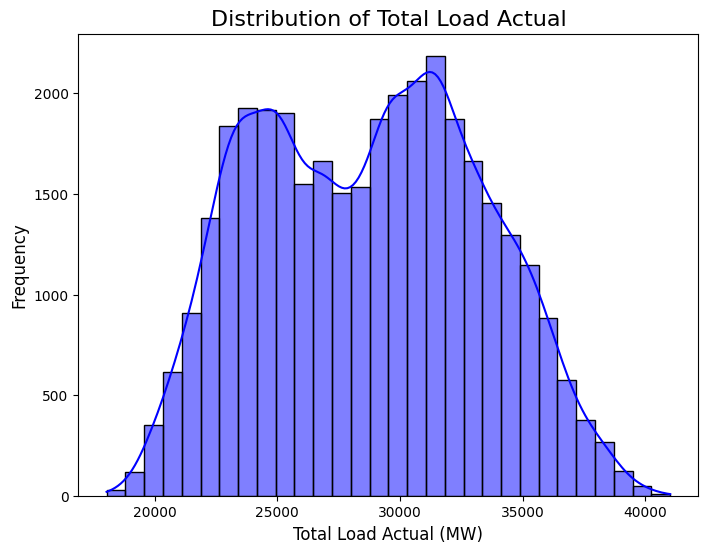

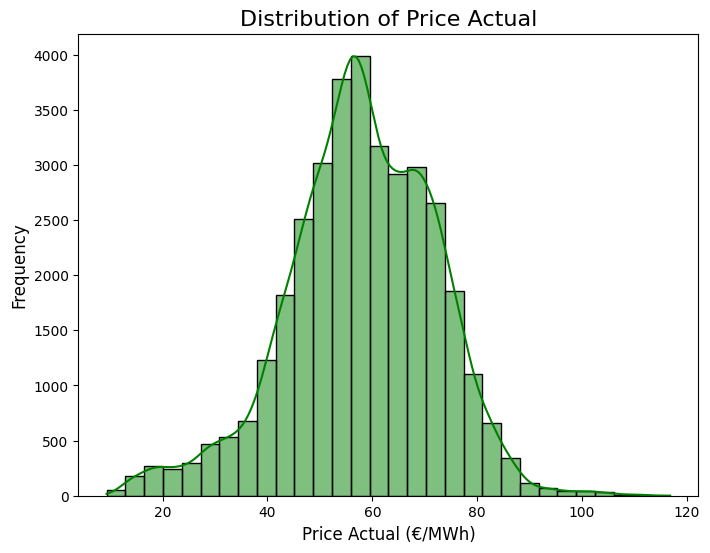

In [76]:
# Distribution of Total Load Actual
plt.figure(figsize=(8, 6))
sns.histplot(forecastor['total load actual'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Load Actual', fontsize=16)
plt.xlabel('Total Load Actual (MW)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Distribution of Price Actual
plt.figure(figsize=(8, 6))
sns.histplot(forecastor['price actual'], bins=30, kde=True, color='green')
plt.title('Distribution of Price Actual', fontsize=16)
plt.xlabel('Price Actual (€/MWh)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


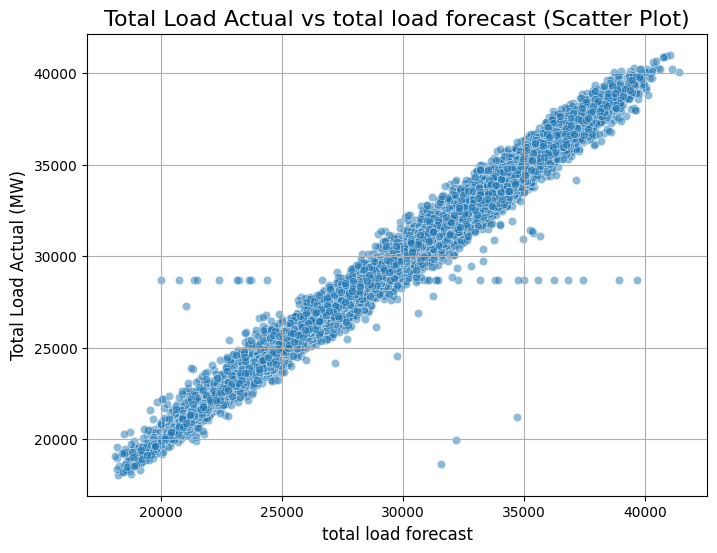

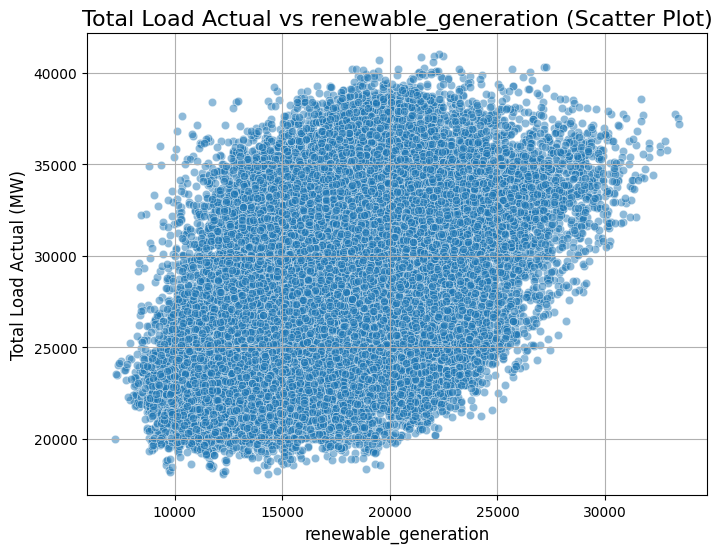

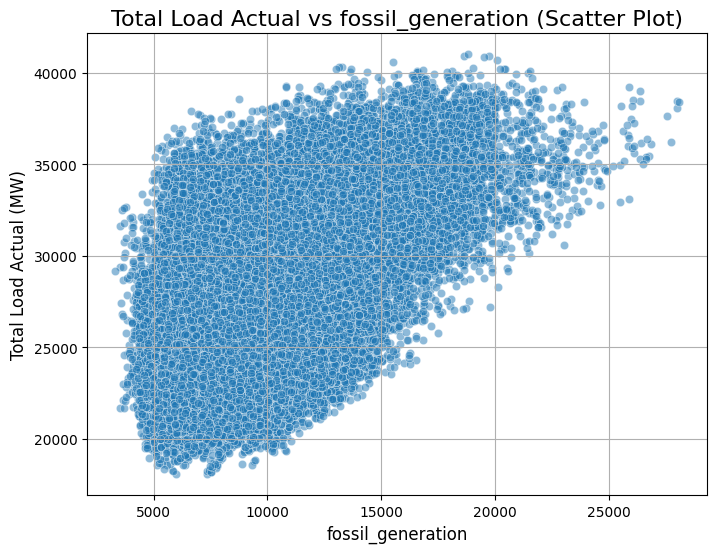

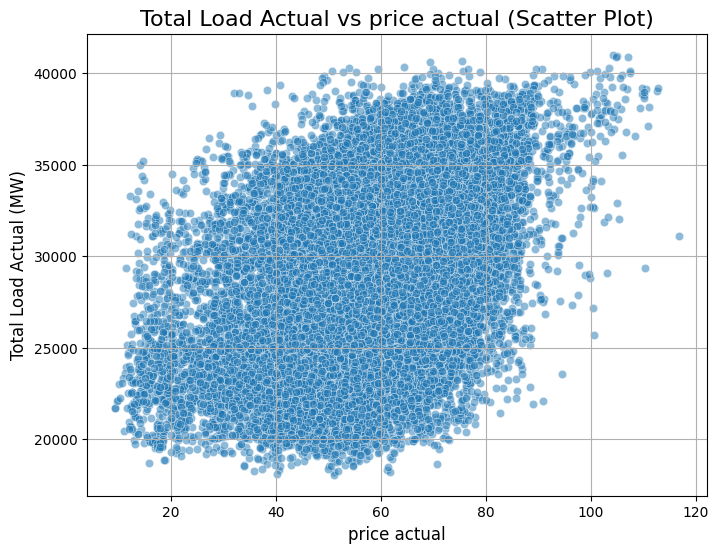

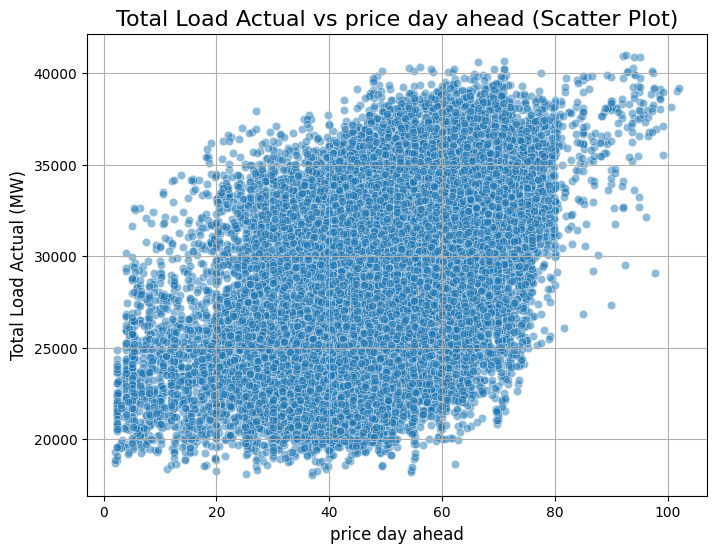

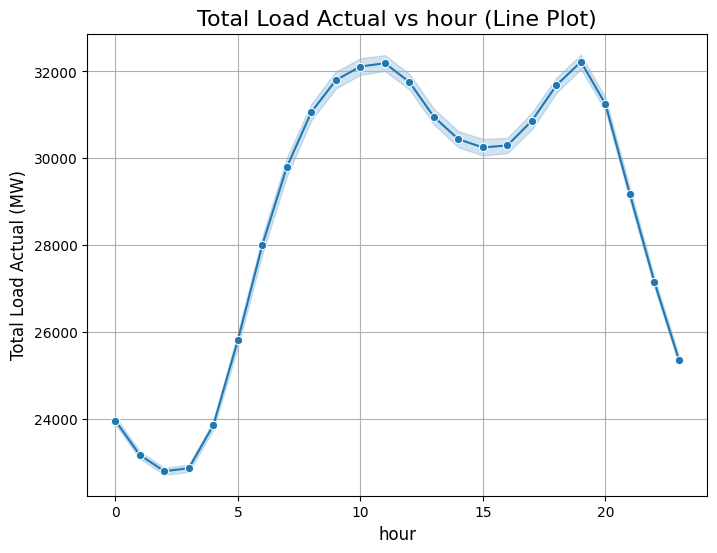

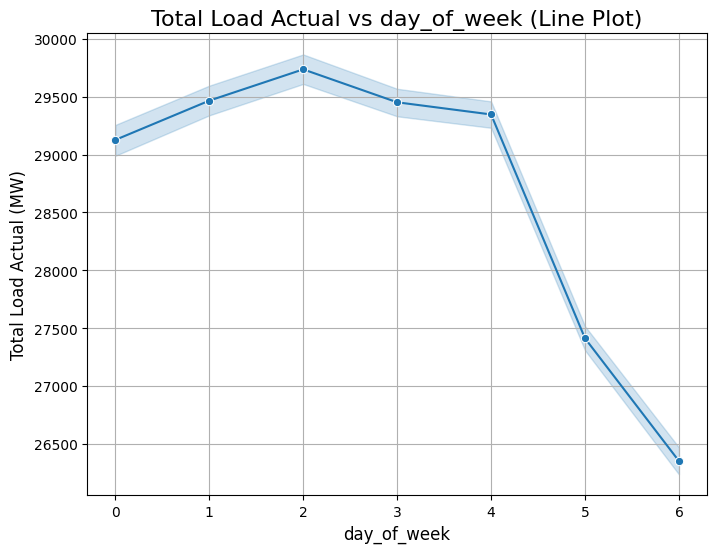

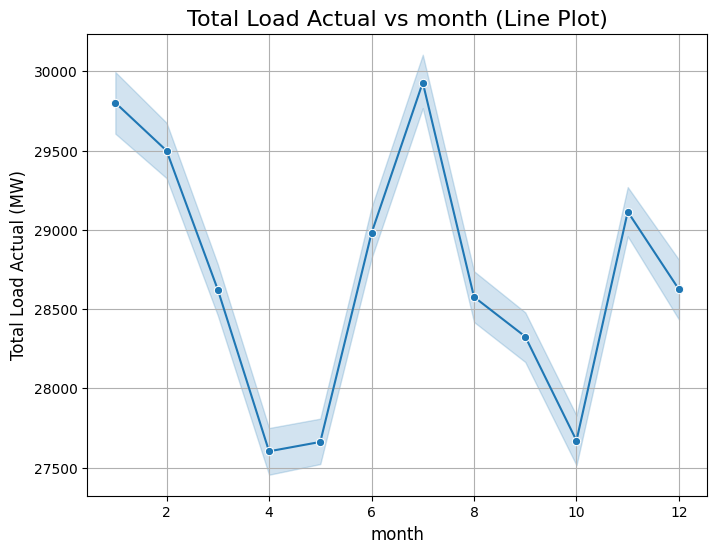

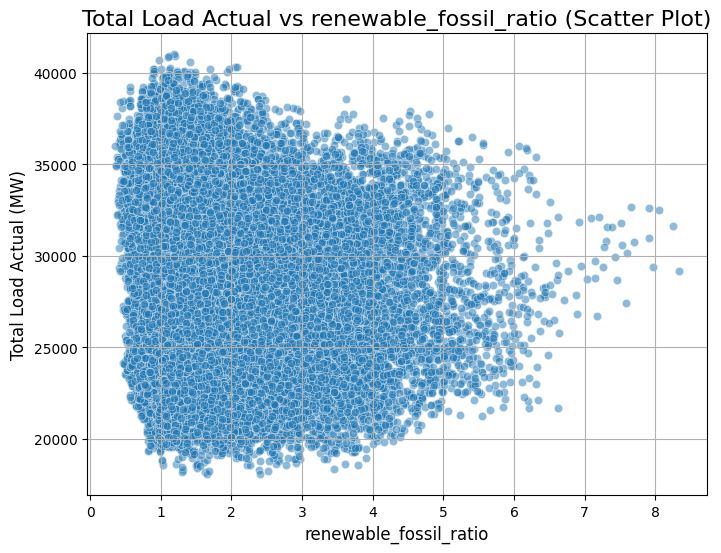

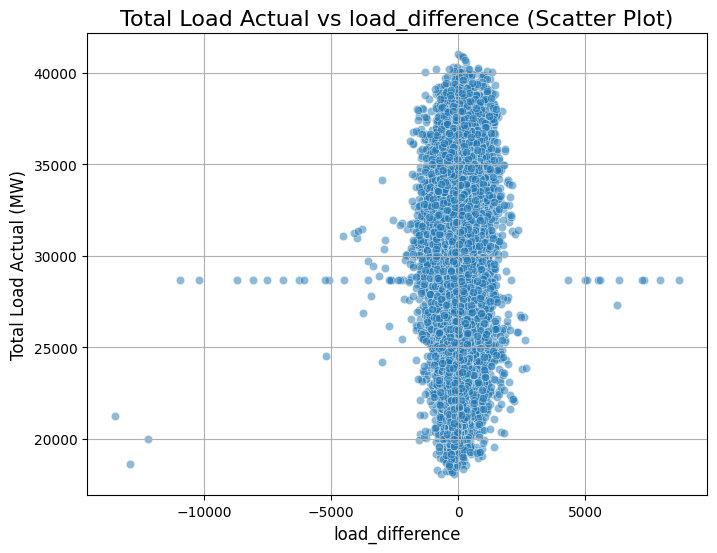

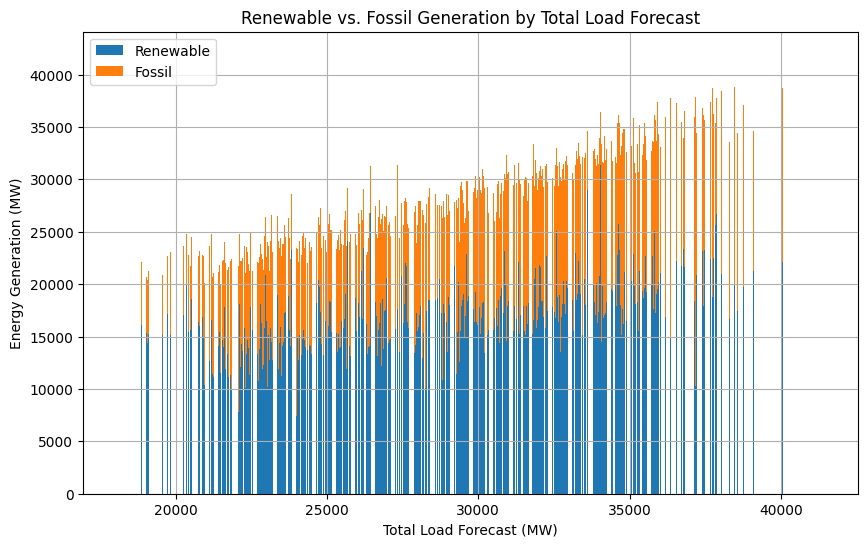

In [58]:

# Define all features to plot against 'total load actual'
features = [
    'total load forecast', 'renewable_generation', 'fossil_generation',
    'price actual', 'price day ahead', 'hour', 'day_of_week', 'month',
    'renewable_fossil_ratio', 'load_difference'
]

# Create plots for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    if feature in ['hour', 'day_of_week', 'month']:  # Categorical/temporal features
        sns.lineplot(x=feature, y='total load actual', data=forecastor, marker='o')
        plt.title(f"Total Load Actual vs {feature} (Line Plot)", fontsize=16)
    else:  # Continuous/numerical features
        sns.scatterplot(x=feature, y='total load actual', data=forecastor, alpha=0.5)
        plt.title(f"Total Load Actual vs {feature} (Scatter Plot)", fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Total Load Actual (MW)', fontsize=12)
    plt.grid(True)
    plt.show()

# Group data by 'total load forecast' and calculate the mean renewable and fossil generation
grouped_data = forecastor.groupby('total load forecast')[['renewable_generation', 'fossil_generation']].mean()

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['renewable_generation'], label='Renewable')
plt.bar(grouped_data.index, grouped_data['fossil_generation'], bottom=grouped_data['renewable_generation'], label='Fossil')
plt.title('Renewable vs. Fossil Generation by Total Load Forecast')
plt.xlabel('Total Load Forecast (MW)')
plt.ylabel('Energy Generation (MW)')
plt.legend()
plt.grid(True)
plt.show()


General Business Insights
Grid Reliability: Discrepancies between the forecasted and actual energy load, particularly during peak demand periods, highlight areas where grid management and energy supply planning can be improved. By addressing these mismatches, energy providers can enhance reliability and reduce the risk of shortages or over-supply.

Pricing Strategies: The relationship between energy prices and total load provides valuable insights for optimizing pricing models. For instance, during periods of high demand, companies can implement demand-response programs or adjust tariffs to balance consumption and supply effectively.

Sustainability Goals: Analyzing the ratio of renewable to fossil fuel generation sheds light on the energy system's sustainability performance. This information is critical for policymakers and businesses aiming to transition to cleaner energy sources and reduce carbon emissions.

Seasonal Preparedness: Seasonal variations in energy demand require proactive planning. Insights from temporal patterns, such as increased heating demand in winter or cooling in summer, can guide investments in renewable energy capacities and ensure adequate fossil fuel reserves to meet seasonal peaks.

Linear Regression - MSE: 224837.64120483492 R²: 0.989212439963163
Random Forest - MSE: 219838.5555378567 R²: 0.9894522927585973


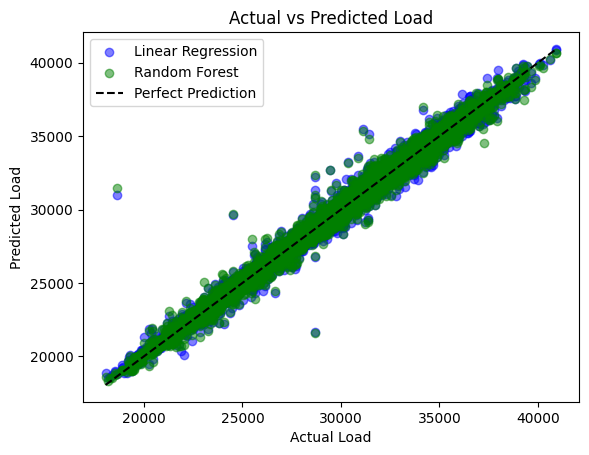

Saved Linear Regression model as linear_regression_model.pkl
Scaler saved as scaler.pkl


<ipython-input-82-9471871e0bb9>:63: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_timestamps = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-12-31', freq='M')


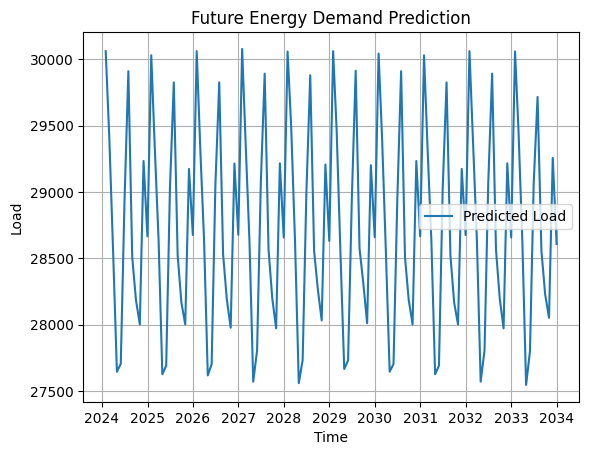

In [82]:
#Define Features (X) and Target (y)
features = ['total load forecast', 'renewable_generation', 'fossil_generation',
            'price actual', 'price day ahead', 'hour', 'day_of_week', 'month']
X = forecastor[features]
y = forecastor['total load actual']


#Split the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale Features for Linear Regression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

#Train Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

#Evaluate Both Models
from sklearn.metrics import mean_squared_error, r2_score
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Linear Regression - MSE:", mse_lr, "R²:", r2_lr)
print("Random Forest - MSE:", mse_rf, "R²:", r2_rf)

#Plot Results
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.5, color='blue')
plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.5, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Load")
plt.ylabel("Predicted Load")
plt.legend()
plt.title("Actual vs Predicted Load")
plt.show()

#Save the Model
joblib.dump(lr_model, "linear_regression_model.pkl")
print("Saved Linear Regression model as linear_regression_model.pkl")

joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as scaler.pkl")


#Generate Future Data
def generate_future_years(start_year, end_year):
    # Make dates for future years (monthly frequency)
    future_timestamps = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-12-31', freq='M')
    future_data = pd.DataFrame({'time': future_timestamps})
    future_data['hour'] = 12  # Set all times to noon
    future_data['day_of_week'] = future_data['time'].dt.dayofweek
    future_data['month'] = future_data['time'].dt.month

    # Repeat average values for each year
    num_years = end_year - start_year + 1

    # Average values for other features
    #Use transform to create a Series with the same index as future_data
    future_data['total load forecast'] = future_data['month'].transform(lambda m: forecastor.groupby('month')['total load forecast'].mean()[m])
    future_data['renewable_generation'] = future_data['month'].transform(lambda m: forecastor.groupby('month')['renewable_generation'].mean()[m])
    future_data['fossil_generation'] = future_data['month'].transform(lambda m: forecastor.groupby('month')['fossil_generation'].mean()[m])
    future_data['price actual'] = future_data['month'].transform(lambda m: forecastor.groupby('month')['price actual'].mean()[m])
    future_data['price day ahead'] = future_data['month'].transform(lambda m: forecastor.groupby('month')['price day ahead'].mean()[m])

    return future_data
future_data = generate_future_years(2024, 2033)

# Predict Future Load
future_features = ['total load forecast', 'renewable_generation', 'fossil_generation',
                   'price actual', 'price day ahead', 'hour', 'day_of_week', 'month']

if isinstance(best_model, LinearRegression):
    future_data[future_features] = scaler.transform(future_data[future_features])

future_data['predicted_total_load'] = best_model.predict(future_data[future_features])

# Plot Future Predictions
plt.plot(future_data['time'], future_data['predicted_total_load'], label="Predicted Load")
plt.xlabel("Time")
plt.ylabel("Load")
plt.title("Future Energy Demand Prediction")
plt.grid()
plt.legend()
plt.show()


Defining Features and Target
The selected features represent key variables that impact energy load forecasting:

**Independent Variables (X):**
total load forecast: Grid operator's forecasted load.
renewable_generation: Total energy generated from renewable sources.
fossil_generation: Total energy generated from fossil sources.
price actual: Real-time energy price.
price day ahead: Forecasted energy price for the next day.
hour, day_of_week, month: Temporal features to capture cyclical and seasonal variations.

**Target Variable (y):**
total load actual: Actual observed energy load